In [50]:
# library
import pandas as pd 
import string, re
import emoji
import numpy as np

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

### Input Dataset

In [51]:
# load dataset
dataset = pd.read_excel('D:\SKRIPSI\Program\data\Dataset_Ulasan.xlsx')

In [52]:
dataset

,comment
0,penjualnya fast respon.. dan barang nya jg cep...
1,recomended ... barang sesuai .. pengiriman cepat
2,kemaren pesen hari ini sdh sampai..good produk...
3,kerennnnn pake banget
4,Sy suka produk di toko ini. Sdh bbrp kali beli...
...,...
2168,"Bagus, suka suka.. walau agak lama nunggunya"
2169,"Sukaaa design nya, jahitannya rapi bahannya te..."
2170,sukaaaak bagusss
2171,Origin produk Indonesia. Komunikasi dg penjual...


In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2173 entries, 0 to 2172
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  2087 non-null   object
dtypes: object(1)
memory usage: 17.1+ KB


In [54]:
dataset.isna().sum()

comment    86
dtype: int64

In [55]:
dataset.duplicated().sum()

247

### Preprocessing

#### 1. Case Folding

In [56]:
dataset['comment_lower'] = dataset['comment'].str.lower()

In [57]:
dataset

,comment,comment_lower
0,penjualnya fast respon.. dan barang nya jg cep...,penjualnya fast respon.. dan barang nya jg cep...
1,recomended ... barang sesuai .. pengiriman cepat,recomended ... barang sesuai .. pengiriman cepat
2,kemaren pesen hari ini sdh sampai..good produk...,kemaren pesen hari ini sdh sampai..good produk...
3,kerennnnn pake banget,kerennnnn pake banget
4,Sy suka produk di toko ini. Sdh bbrp kali beli...,sy suka produk di toko ini. sdh bbrp kali beli...
...,...,...
2168,"Bagus, suka suka.. walau agak lama nunggunya","bagus, suka suka.. walau agak lama nunggunya"
2169,"Sukaaa design nya, jahitannya rapi bahannya te...","sukaaa design nya, jahitannya rapi bahannya te..."
2170,sukaaaak bagusss,sukaaaak bagusss
2171,Origin produk Indonesia. Komunikasi dg penjual...,origin produk indonesia. komunikasi dg penjual...


#### 2. Noise Cleaning

In [58]:
# menghapus duplikat
dataset = dataset.drop_duplicates(keep='first')

# menghapus baris yang memiliki nilai NaN pada kolom comment
dataset = dataset.dropna(subset=['comment'])

In [59]:
def noise_cleaning(teks):
    teks = emoji.replace_emoji(teks, replace='')        # hapus emoji
    teks = re.sub(r'&[a-zA-Z]+;', '', teks)             # bersihkan tag html
    teks = re.sub(r'[^\w\s]', ' ', teks)                # ganti tanda baca dengan spasi
    teks = re.sub(r'\b[a-zA-Z]\b', '', teks)            # hapus satu huruf
    teks = re.sub(r'\s+', ' ', teks).strip()            # hapus spasi berlebih
    teks = re.sub(r'(\w+?)(nya)\b', r'\1 \2', teks)     # memisahkan kata (+nya)
    teks = re.sub(r'(.)\1{1,}', r'\1', teks)            # menghapus huruf berulang
    teks = re.sub(r'\bgod\b', 'good', teks)             # mengganti kata god menjadi good
    return teks

In [60]:
# apply noise cleaning
dataset['comment_clean'] = dataset['comment_lower'].apply(noise_cleaning)

In [61]:
# mengubah teks kosong menjadi NaN
dataset['comment_clean'] = dataset['comment_clean'].replace('', np.nan) 

In [62]:
# menghapus baris yang memiliki nilai NaN pada kolom comment_clean
dataset = dataset.dropna(subset=['comment_clean'])

In [63]:
dataset.shape

(1905, 3)

#### 3. Normalisasi

In [64]:
# load dataset normalisasi
kamus_alay = pd.read_csv('D:\SKRIPSI\Program\data\kamusalay.csv', names=['alay', 'baku'], encoding='ISO-8859-1')

In [65]:
# membuat dictionary dari kamusalay.csv
normalisasi_dict_2 = dict(zip(kamus_alay['alay'], kamus_alay['baku']))

In [66]:
# membuat fungsi normalisasi 
def normalisasi_teks_2(teks):
    kata_list = teks.split()
    hasil = []
    for kata in kata_list:
        if kata in normalisasi_dict_2:
            hasil.append(normalisasi_dict_2[kata])
        else:
            hasil.append(kata)
    return ' '.join(hasil)

In [67]:
# apply normalisasi 
dataset['comment_normalized'] = dataset['comment_clean'].apply(normalisasi_teks_2)

In [68]:
dataset

,comment,comment_lower,comment_clean,comment_normalized
0,penjualnya fast respon.. dan barang nya jg cep...,penjualnya fast respon.. dan barang nya jg cep...,penjual nya fast respon dan barang nya jg cepe...,penjual nya fast respon dan barang nya juga ce...
1,recomended ... barang sesuai .. pengiriman cepat,recomended ... barang sesuai .. pengiriman cepat,recomended barang sesuai pengiriman cepat,recomended barang sesuai pengiriman cepat
2,kemaren pesen hari ini sdh sampai..good produk...,kemaren pesen hari ini sdh sampai..good produk...,kemaren pesen hari ini sdh sampai good produk ...,kemarin pesan hari ini sudah sampai good produ...
3,kerennnnn pake banget,kerennnnn pake banget,keren pake banget,keren pakai banget
4,Sy suka produk di toko ini. Sdh bbrp kali beli...,sy suka produk di toko ini. sdh bbrp kali beli...,sy suka produk di toko ini sdh brp kali beli d...,saya suka produk di toko ini sudah berapa kali...
...,...,...,...,...
2168,"Bagus, suka suka.. walau agak lama nunggunya","bagus, suka suka.. walau agak lama nunggunya",bagus suka suka walau agak lama nungu nya,bagus suka suka walau agak lama nungu nya
2169,"Sukaaa design nya, jahitannya rapi bahannya te...","sukaaa design nya, jahitannya rapi bahannya te...",suka design nya jahitan nya rapi bahan nya teb...,suka design nya jahitan nya rapi bahan nya teb...
2170,sukaaaak bagusss,sukaaaak bagusss,sukak bagus,suka bagus
2171,Origin produk Indonesia. Komunikasi dg penjual...,origin produk indonesia. komunikasi dg penjual...,origin produk indonesia komunikasi dg penjual ...,origin produk indonesia komunikasi dengan penj...


### Melatih Dataset Menggunakan Model Word2Vec

In [69]:
import os
import pandas as pd
import nltk
from tqdm.auto import tqdm
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

In [70]:
sentences = [word_tokenize(str(text).lower()) for text in tqdm(dataset.comment_normalized)]
sentences[:5]

  0%|          | 0/1905 [00:00<?, ?it/s]

[['penjual',
  'nya',
  'fast',
  'respon',
  'dan',
  'barang',
  'nya',
  'juga',
  'cepat',
  'datang',
  'pokok',
  'nya',
  'fast',
  'and',
  'fast'],
 ['recomended', 'barang', 'sesuai', 'pengiriman', 'cepat'],
 ['kemarin',
  'pesan',
  'hari',
  'ini',
  'sudah',
  'sampai',
  'good',
  'produk',
  'nya',
  'thanks'],
 ['keren', 'pakai', 'banget'],
 ['saya',
  'suka',
  'produk',
  'di',
  'toko',
  'ini',
  'sudah',
  'berapa',
  'kali',
  'beli',
  'dan',
  'selalu',
  'puas',
  'dengan',
  'servis',
  'dan',
  'pengiriman',
  'nya']]

#### Training Model

In [71]:
# model = Word2Vec(sentences, 
#                  vector_size=128, 
#                  window=3, 
#                  min_count=1, 
#                  workers=4, 
#                  epochs=1000, 
#                  sg=0, # CBOW
#                  hs=0)

#### Save Model

In [72]:
# os.makedirs("model/w2v/", exist_ok = True)

In [73]:
# model.save("model/w2v/pretrained_model")

#### Ekstrak Similiar Words

In [74]:
model = Word2Vec.load("model/w2v/pretrained_model")

In [75]:
w2v = model.wv

In [76]:
# ekstrak similar word berdasarkan variabel kamus_kata_benda
kamus_kata_benda = ["tas", "totebag","desain", "penampilan", "gaya", "motif", "warna", "ukuran", "bentuk",
                    "bahan", "kain", "jahitan", "tampilan","potongan"]
similar_words = {}
for kata in kamus_kata_benda:
    try:
        similar_words[kata] = w2v.most_similar(kata, topn=10)
    except KeyError:
        similar_words[kata] = []

In [78]:
from itertools import chain

In [79]:
# jadikan dataframe
df_similar_word = pd.DataFrame(list(chain(*similar_words.values())), columns=['kata', 'similar_words'])
df_similar_word

,kata,similar_words
0,banget,0.513795
1,dan,0.461606
2,nya,0.454236
3,juga,0.436078
4,lucu,0.412517
...,...,...
135,desain,0.489571
136,terlihat,0.485324
137,tebal,0.419798
138,produk,0.369767


### Validasi Kata *Kansei* Menggunakan Kamus *Kansei*

In [81]:
kamus_kata_sifat = [
                    "rapi", "unik", "nyaman", "aman", "modern", "lembut", "elegan", "antik", "menarik", 
                    "sederhana", "kreatif", "berwarna-warni", "modis", "estetis", "ekspresif", 
                    "artistik", "halus", "lembut", "retro", "ceria", "cerah", 
                    "modis", "fashionable", "klasik", "canggih", "stabil", "feminin", "profesional", 
                    "kasual", "hidup", "penuh suasana", "kuat", "mewah", "minimalis", "formal",  
                    "khas", "ringan", "simpel", "kompleks", "kontemporer", "maskulin"
                    "keren", "bagus", "cantik", "lucu", "kalem", "natural", "tebal"
                    ]

In [82]:
# ekstrak df_similar_word berdasarkan kamus_kata_benda
df_kata_kansei = df_similar_word[df_similar_word['kata'].isin(kamus_kata_sifat)]
df_kata_kansei 

,kata,similar_words
4,lucu,0.412517
5,bagus,0.403965
20,lembut,0.493182
23,cantik,0.427603
25,nyaman,0.385397
26,rapi,0.374885
57,bagus,0.257909
62,bagus,0.436105
64,rapi,0.405559
69,lucu,0.315468


In [83]:
# menyaring kata kansei yang memiliki similar words yang tinggi
df_kata_kansei = df_kata_kansei.loc[df_kata_kansei.groupby('kata')['similar_words'].idxmax()]
df_kata_kansei

,kata,similar_words
91,bagus,0.524303
131,cantik,0.602247
123,elegan,0.401474
122,kasual,0.420815
130,lembut,0.661340
4,lucu,0.412517
120,modern,0.430758
132,nyaman,0.510321
93,rapi,0.513508
124,simpel,0.387682


In [84]:
# mendapatkan vektor dari kata-kata kansei
def get_word_vector(word):
    try:
        return w2v[word]
    except KeyError:
        return np.zeros(w2v.vector_size)
# mendapatkan vektor untuk setiap kata
df_kata_kansei['vektor'] = df_kata_kansei['kata'].apply(get_word_vector)

In [85]:
df_kata_kansei

,kata,similar_words,vektor
91,bagus,0.524303,"[-0.48358458, 1.3537197, -0.40575576, 0.116827..."
131,cantik,0.602247,"[-1.0010285, 0.02112281, -1.0137289, 0.9863603..."
123,elegan,0.401474,"[0.7857313, 1.7321349, -1.9406658, 1.4515483, ..."
122,kasual,0.420815,"[0.9295768, -1.4440308, 0.29617244, -1.3333489..."
130,lembut,0.661340,"[0.2618268, 0.21090002, -1.5237114, 0.7171513,..."
4,lucu,0.412517,"[0.10866257, 2.1779838, -0.7292379, -0.6229986..."
120,modern,0.430758,"[1.2598077, 0.16683854, -0.3510573, -0.2913357..."
132,nyaman,0.510321,"[-2.3342586, 0.5450047, -1.0799592, -1.732611,..."
93,rapi,0.513508,"[-2.0491467, 1.0353884, 0.5865311, -0.28014356..."
124,simpel,0.387682,"[1.656277, 1.0110875, -2.802456, 0.009799599, ..."


### Reduksi Dimensi Vektor

In [86]:
# reduksi dimensi dengan pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [87]:
# Ambil vektor dari DataFrame
X = np.array(df_kata_kansei['vektor'].tolist())

In [88]:
#  Normalisasi data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [89]:
# lakukan PCA
pca = PCA(n_components=2, random_state = 42)
X_reduced = pca.fit_transform(X_scaled)
df_kata_kansei['X'] = X_reduced[:, 0]
df_kata_kansei['Y'] = X_reduced[:, 1]
df_kata_kansei

,kata,similar_words,vektor,X,Y
91,bagus,0.524303,"[-0.48358458, 1.3537197, -0.40575576, 0.116827...",0.412680,-1.340996
131,cantik,0.602247,"[-1.0010285, 0.02112281, -1.0137289, 0.9863603...",0.999561,0.463534
123,elegan,0.401474,"[0.7857313, 1.7321349, -1.9406658, 1.4515483, ...",-2.368315,0.949984
122,kasual,0.420815,"[0.9295768, -1.4440308, 0.29617244, -1.3333489...",-1.724423,-0.925483
130,lembut,0.661340,"[0.2618268, 0.21090002, -1.5237114, 0.7171513,...",2.031834,1.058545
4,lucu,0.412517,"[0.10866257, 2.1779838, -0.7292379, -0.6229986...",-0.370682,-2.720053
120,modern,0.430758,"[1.2598077, 0.16683854, -0.3510573, -0.2913357...",-2.174223,0.961232
132,nyaman,0.510321,"[-2.3342586, 0.5450047, -1.0799592, -1.732611,...",2.306116,1.743848
93,rapi,0.513508,"[-2.0491467, 1.0353884, 0.5865311, -0.28014356...",1.166997,-1.071290
124,simpel,0.387682,"[1.656277, 1.0110875, -2.802456, 0.009799599, ...",-1.931858,1.269918


### Klasterisasi Menggunakan Model *K-Means Clustering*

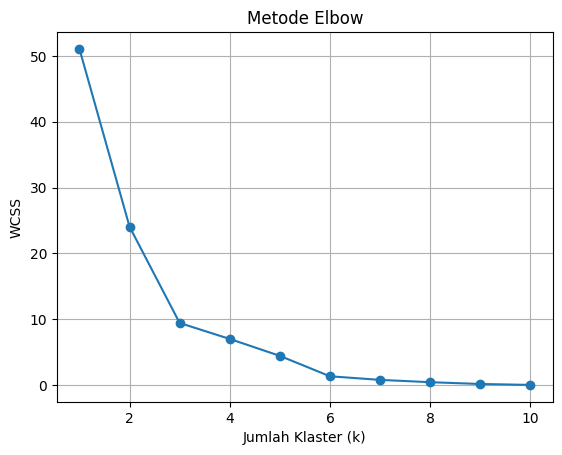

In [90]:
# Menghitung KElbow
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_reduced)  # X adalah data Anda (numpy array atau DataFrame)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

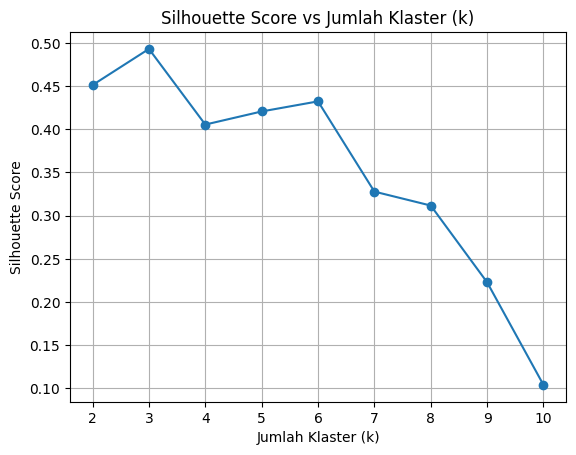

In [91]:
# Menghitung Silhouette Score
from sklearn.metrics import silhouette_score

silhouette_scores = []
K = range(2, 11)  # mulai dari 2 karena silhouette tidak didefinisikan untuk k=1

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_reduced)  # X = data (array atau DataFrame)
    score = silhouette_score(X_reduced, cluster_labels)
    silhouette_scores.append(score)

# Plot hasilnya
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Jumlah Klaster (k)')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [99]:
# Klaster dengan KMeans
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_reduced)
df_kata_kansei['Cluster'] = kmeans.labels_
df_kata_kansei['Cluster'] = df_kata_kansei['Cluster'].astype(str)
df_kata_kansei

,kata,similar_words,vektor,X,Y,Cluster
91,bagus,0.524303,"[-0.48358458, 1.3537197, -0.40575576, 0.116827...",0.412680,-1.340996,2
131,cantik,0.602247,"[-1.0010285, 0.02112281, -1.0137289, 0.9863603...",0.999561,0.463534,0
123,elegan,0.401474,"[0.7857313, 1.7321349, -1.9406658, 1.4515483, ...",-2.368315,0.949984,1
122,kasual,0.420815,"[0.9295768, -1.4440308, 0.29617244, -1.3333489...",-1.724423,-0.925483,1
130,lembut,0.661340,"[0.2618268, 0.21090002, -1.5237114, 0.7171513,...",2.031834,1.058545,0
4,lucu,0.412517,"[0.10866257, 2.1779838, -0.7292379, -0.6229986...",-0.370682,-2.720053,2
120,modern,0.430758,"[1.2598077, 0.16683854, -0.3510573, -0.2913357...",-2.174223,0.961232,1
132,nyaman,0.510321,"[-2.3342586, 0.5450047, -1.0799592, -1.732611,...",2.306116,1.743848,0
93,rapi,0.513508,"[-2.0491467, 1.0353884, 0.5865311, -0.28014356...",1.166997,-1.071290,2
124,simpel,0.387682,"[1.656277, 1.0110875, -2.802456, 0.009799599, ...",-1.931858,1.269918,1


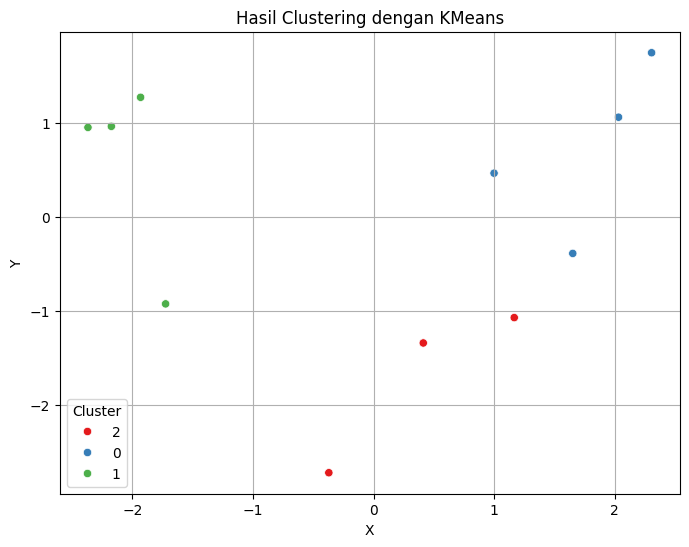

In [100]:
# visualisasi hasil clustering
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_kata_kansei, x='X', y='Y', hue='Cluster', palette='Set1')
plt.title('Hasil Clustering dengan KMeans')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [101]:
# menghitung silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_reduced, kmeans.labels_)
silhouette_avg

0.4929451

In [102]:
# kelompokkan kata sifat berdasarkan cluster
df_kata_kansei.groupby('Cluster')['kata'].apply(list).reset_index()

,Cluster,kata
0,0,"[cantik, lembut, nyaman, tebal]"
1,1,"[elegan, kasual, modern, simpel]"
2,2,"[bagus, lucu, rapi]"


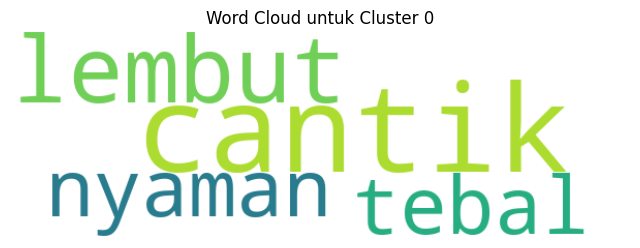

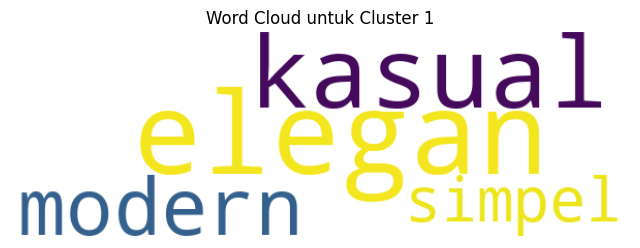

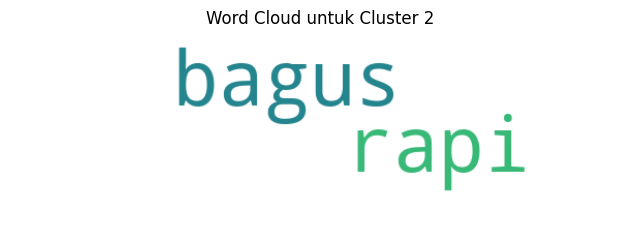

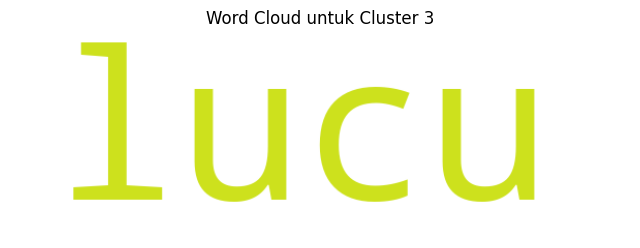

In [96]:
# wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Fungsi untuk membuat wordcloud
def create_wordcloud(text, cluster_num):
    wordcloud = WordCloud(width=600, height=200,
                          background_color='white',
                          colormap='viridis').generate(text)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud untuk Cluster {cluster_num}')
    plt.show()

for cluster_num in sorted(df_kata_kansei['Cluster'].unique()):
    # Gabungkan kata sifat dari semua teks dalam klaster tersebut
    cluster_text = " ".join(df_kata_kansei[df_kata_kansei['Cluster'] == cluster_num]['kata'].dropna())
    
    # Tampilkan wordcloud
    create_wordcloud(cluster_text, cluster_num)


In [97]:
df_cluster = df_kata_kansei[['kata', 'Cluster']]

In [98]:
# simpan hasil clustering ke file CSV
df_cluster.to_csv('hasil_clustering.csv', index=False)